## Skill Activity:3
* Date: 11-07-2021
* Name: Pratibha S. Gupta.
* Email_id : gpratibha970@gmail.com
* Module Code: ML14
* Time taken to complete the activity?
   5 hours .

**Problem Statement**
- 1) Read the data : AUTO.csv  available on  https://drive.google.com/drive/u/0/folders/1-ExHeY9XMESggMWj-J4MIOR74Ya9EhrH
- 2) Perform descriptive analysis, exploratory analysis, ask question to perform inferential statistics on data. Check if correlation exist or not.
- 3) implement linear regression using sklearn package and statsmodels
- 4)check p-values to select proper features and implement above models again.
- 5) interpret the metrics and r2 score, adj r2 score

**Variable information:**
- mpg: Miles Per Gallon
- cylinders: Number of cylinders used
- displacement: combined volume of all its cylinders i.e engine capacity
- horsepower: Power that engine produces
- weight: mass of vehicle.
- acceleration: Rate of change of velocity
- model year: model built year
- origin: source
- name: car name

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model 
import statsmodels.api as sm
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('Auto.xlsx')
data.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


2) Perform descriptive analysis, exploratory analysis, ask question to perform inferential statistics on data. Check if correlation exist or not.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
#Horsepower variable showing in string,but it is an integer.
#this horsepower variable is mixed type
data['horsepower']=pd.to_numeric(data['horsepower'],errors='coerce')
data['mpg']=data['mpg'].astype('float64')

In [5]:
data.shape

(397, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [7]:
data.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000,397
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307,NaN
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000,NaN
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000,NaN


In [8]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


<AxesSubplot:>

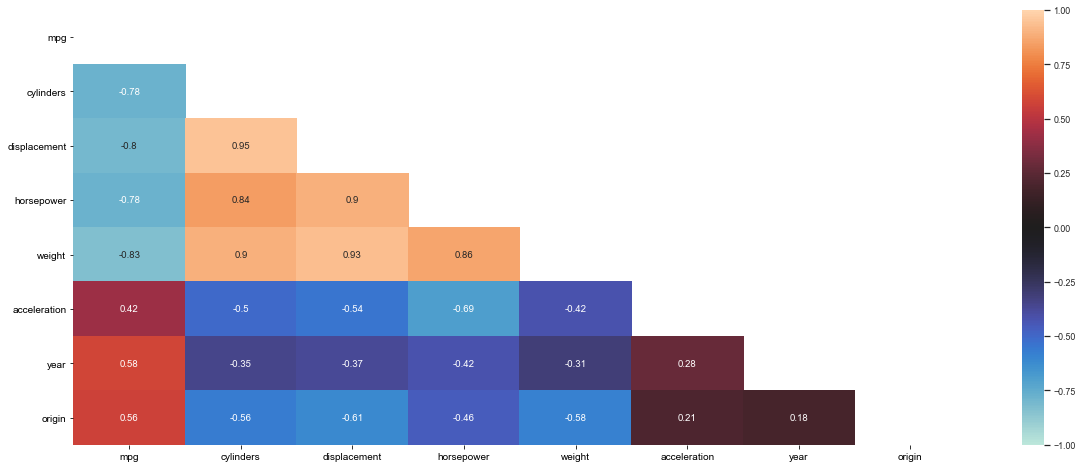

In [9]:
plt.subplots(figsize=(20,8))
sns.set(font_scale=0.8)
mask = np.triu(data.corr())
sns.heatmap(data.corr(),annot=True,vmin=-1, vmax=1, center= 0,mask=mask)

- From correlation plot we can see that **'cylinders','displacement','horsepower','weight'** are the attributes that are highly related with MPG. So we can select these features in our model.

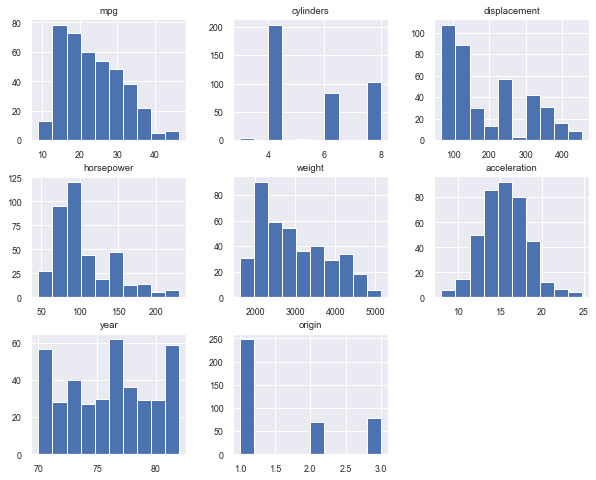

In [10]:
data.hist(figsize=(10,8))
plt.show()

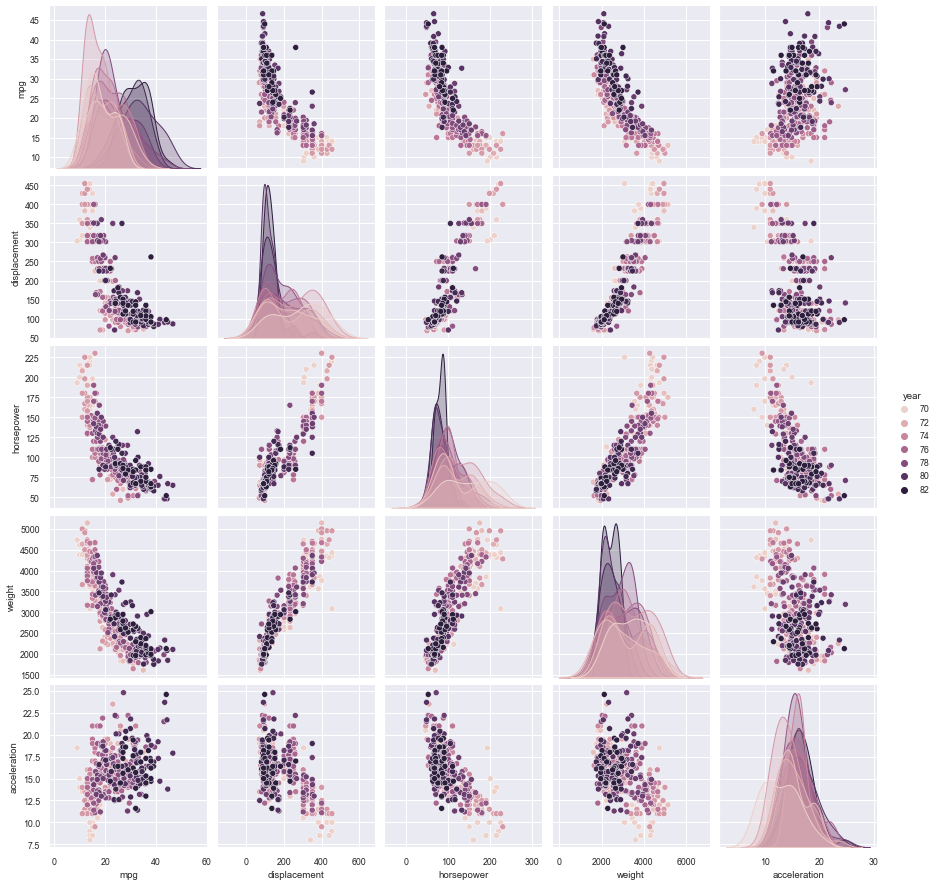

In [11]:
sns.pairplot(data[['mpg','displacement','horsepower','weight','acceleration','year']],hue='year',kind='scatter')

from the above graph we can say that when we divided the data as per the year then:
- MPG and Acceleration has almost 0 or no correlation.
- weight and acceleration also has almost 0 or no correlation, we can see that all variables with acceleration has almost 0 or no correlation.
- weight with horsepower and displacement has positive and linear relation.
- rest all variables seems few negative,few positive with curvilinear relation.

<AxesSubplot:xlabel='year', ylabel='origin'>

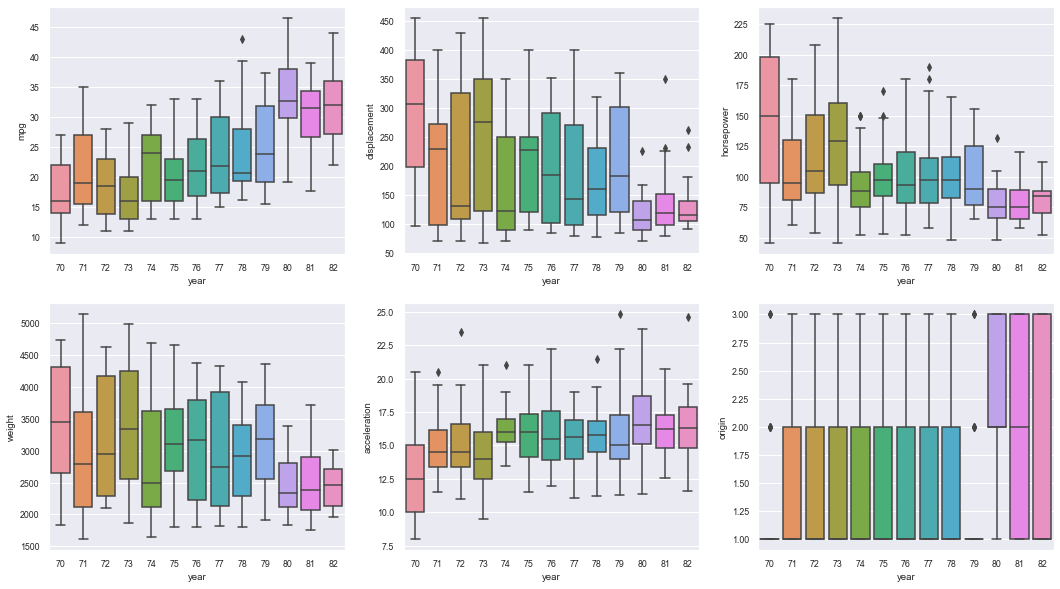

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0], data=data, x='year', y='mpg')
sns.boxplot(ax=axes[0, 1], data=data, x='year', y='displacement')
sns.boxplot(ax=axes[0, 2], data=data, x='year', y='horsepower')
sns.boxplot(ax=axes[1, 0], data=data, x='year', y='weight')
sns.boxplot(ax=axes[1, 1], data=data, x='year', y='acceleration')
sns.boxplot(ax=axes[1, 2], data=data, x='year', y='origin')

In [13]:
#Mean,Median,mode ,variance and standard deviation of variables yearly.
data.groupby(data['year']).agg(['mean','median',pd.Series.mode,'var','std'])

cylinders                                    acceleration         \
          mean median    mode       var       std         mean median   
year                                                                    
70    6.758621    8.0       8  2.975369  1.724926    12.948276  12.50   
71    5.571429    6.0       4  2.772487  1.665079    15.142857  14.50   
72    5.821429    4.0       4  4.300265  2.073708    15.125000  14.50   
73    6.375000    7.0       8  3.266026  1.807215    14.312500  14.00   
74    5.259259    4.0       4  2.507123  1.583390    16.203704  16.00   
75    5.600000    6.0  [4, 6]  2.317241  1.522249    16.050000  16.00   
76    5.647059    6.0       4  2.780749  1.667558    15.941176  15.50   
77    5.464286    4.0       4  3.294974  1.815206    15.435714  15.65   
78    5.361111    5.5       4  2.237302  1.495761    15.805556  15.75   
79    5.827586    6.0       4  3.147783  1.774199    15.813793  15.00   
80    4.137931    4.0       4  0.337438  0.580895    16.934483  16.50   
81    4.620690    4.0       4  1.172414  1.082781    16.306897  16.20   
82    4.200000    4.0       4  0.372414  0.610257    16.510000  16.30   

                                                       origin              \
                          mode        var       std      mean median mode   
year                                                                        
70                        10.0  11.095443  3.330982  1.310345      1    1   
71                        15.5   7.108466  2.666171  1.428571      1    1   
72                        13.5   8.122685  2.850032  1.535714      1    1   
73                [11.0, 13.0]   7.585737  2.754222  1.375000      1    1   
74                        16.5   2.851140  1.688532  1.666667      1    1   
75          [13.5, 16.0, 17.0]   6.109483  2.471737  1.466667      1    1   
76    [13.0, 15.5, 17.6, 17.7]   7.847950  2.801419  1.470588      1    1   
77                        14.5   5.168307  2.273391  1.571429      1    1   
78                        15.8   4.536540  2.129915  1.611111      1    1   
79                        13.2   8.719803  2.952931  1.275862      1    1   
80                        15.5   7.990197  2.826694  2.206897      2    3   
81    [12.6, 14.4, 15.8, 16.4]   4.807094  2.192509  1.965517      2    1   
82                        14.5   5.856103  2.419939  1.666667      1    1   

                          
           var       std  
year                      
70    0.364532  0.603765  
71    0.550265  0.741798  
72    0.628307  0.792658  
73    0.445513  0.667467  
74    0.692308  0.832050  
75    0.533333  0.730297  
76    0.499109  0.706476  
77    0.698413  0.835711  
78    0.701587  0.837608  
79    0.349754  0.591400  
80    0.669951  0.818505  
81    0.891626  0.944259  
82    0.850575  0.922266

In [14]:
#Central tendency of the data
import statistics
print('Mean of the data: \n',data.mean())
print('________________________________________________________\n')
print('Median of the data: \n',data.median())
print('___________________________________________________________\n')
print('Mode of the data: \n',data.drop(columns='name',axis=0).mode())
print('___________________________________________________________________________\n')
print('variance of the data: \n',data.var())
print('___________________________________________________________________________\n')
print('Standard Deviation of the data: \n',data.drop(columns='name',axis=0).std())


Mean of the data: 
 mpg               23.515869
cylinders          5.458438
displacement     193.532746
horsepower       104.469388
weight          2970.261965
acceleration      15.555668
year              75.994962
origin             1.574307
dtype: float64
________________________________________________________

Median of the data: 
 mpg               23.0
cylinders          4.0
displacement     146.0
horsepower        93.5
weight          2800.0
acceleration      15.5
year              76.0
origin             1.0
dtype: float64
___________________________________________________________

Mode of the data: 
     mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  13.0        4.0          97.0       150.0    1985          14.5  73.0   
1   NaN        NaN           NaN         NaN    2130           NaN   NaN   

   origin  
0     1.0  
1     NaN  
___________________________________________________________________________

variance of the data: 
 mpg            

In [15]:
data.skew()    ##Skewness of the data

mpg             0.456005
cylinders       0.522818
displacement    0.716282
horsepower      1.087326
weight          0.530989
acceleration    0.280818
year            0.013108
origin          0.919911
dtype: float64

1. skewness = 0 : normally Skewed or distributed.
2. skewness > 0 : Negative skewed .
3. skewness < 0 : Positive skewed .

In our data all the variables are negative skewed as per the condition.

In [16]:
data.kurtosis()   ##Kurtosis of the data

mpg            -0.517322
cylinders      -1.380668
displacement   -0.753441
horsepower      0.696947
weight         -0.790660
acceleration    0.445525
year           -1.178955
origin         -0.824815
dtype: float64

1. if kurtosis >3, then it is leptokurtic
2. if kutosisi<3, then platykurtic
3. if kurtosis=3, then mesokurtic.

Now here in our data,all variables are platykurtic.

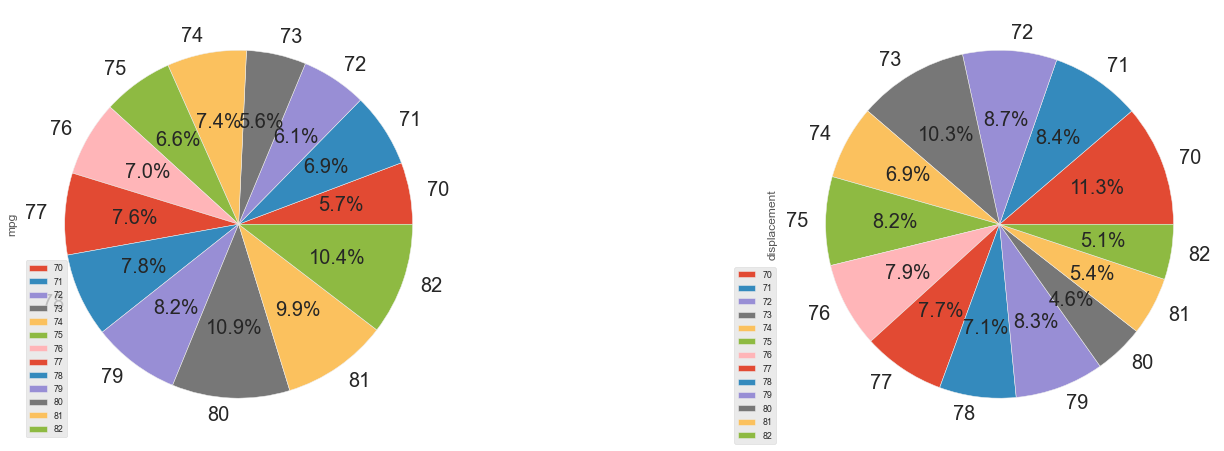

In [17]:
style.use('ggplot')
data.groupby('year')[['mpg','displacement']].mean().plot(kind='pie',subplots=True,figsize=(25,8),autopct='%1.1f%%',fontsize=20)
plt.legend(loc='lower right' , bbox_to_anchor=(-0.005,-0.015))
plt.show()

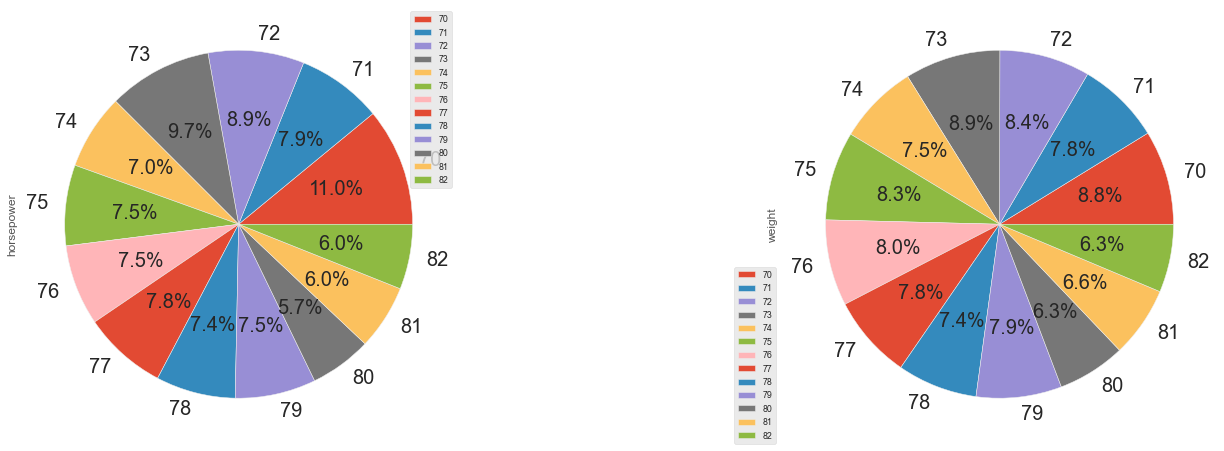

In [18]:
style.use('ggplot')
data.groupby('year')[['horsepower','weight']].mean().plot(kind='pie',subplots=True,figsize=(25,8),autopct='%1.1f%%',fontsize=20)
plt.legend(loc='lower right' , bbox_to_anchor=(-0.005,-0.015))
plt.show()

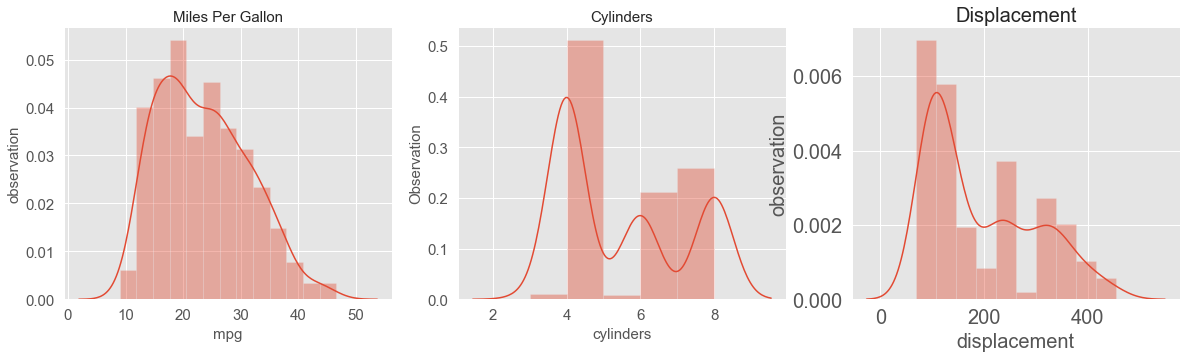

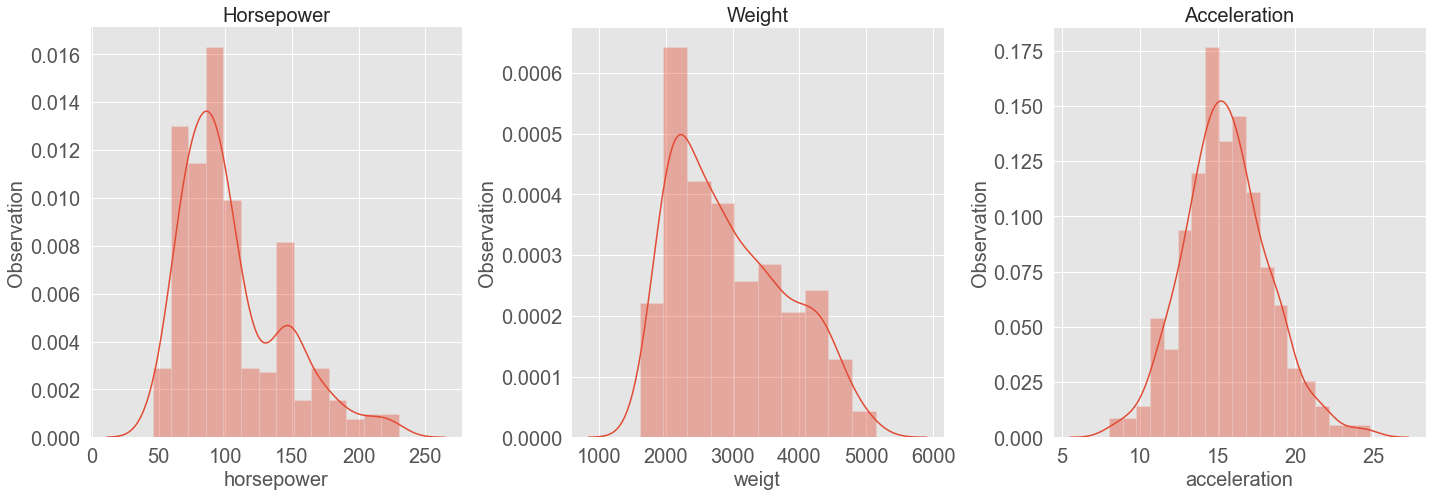

In [19]:
##Independent variables
fig, (ax1, ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
sns.distplot(data['mpg'], ax = ax1)      ## Distribution/density plot for X1(observation 1 of EEG Signals)
sns.despine(ax=ax1)
ax1.set_xlabel('mpg', fontsize=15)
ax1.set_ylabel('observation', fontsize=15)
ax1.set_title('Miles Per Gallon', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(data['cylinders'], ax = ax2)     ## Distribution/density plot for X2(observation 2 of EEG Signals)
sns.despine(ax = ax2)
ax2.set_xlabel('cylinders', fontsize=15)
ax2.set_ylabel('Observation', fontsize=15)
ax2.set_title('Cylinders', fontsize=15)
ax2.tick_params(labelsize=15)

sns.distplot(data['displacement'], ax = ax3)     ## Distribution/density plot for X3(observation 3 of EEG Signals)
sns.despine(ax=ax3)
ax3.set_xlabel('displacement', fontsize=20)
ax3.set_ylabel('observation', fontsize=20)
ax3.set_title('Displacement', fontsize=20)
ax3.tick_params(labelsize=20)

fig, (ax4, ax5,ax6) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 7))

sns.distplot(data['horsepower'], ax = ax4)    ## Distribution/density plot for X4(observation 4 of EEG Signals)
sns.despine(ax = ax4)
ax4.set_xlabel('horsepower', fontsize=20)
ax4.set_ylabel('Observation', fontsize=20)
ax4.set_title('Horsepower', fontsize=20)
ax4.tick_params(labelsize=20)

sns.distplot(data['weight'], ax = ax5)    ## Distribution/density plot for X4(observation 4 of EEG Signals)
sns.despine(ax = ax4)
ax5.set_xlabel('weigt', fontsize=20)
ax5.set_ylabel('Observation', fontsize=20)
ax5.set_title('Weight', fontsize=20)
ax5.tick_params(labelsize=20)

sns.distplot(data['acceleration'], ax = ax6)    ## Distribution plot for X4(observation 4 of EEG Signals)
sns.despine(ax = ax4)
ax6.set_xlabel('acceleration', fontsize=20)
ax6.set_ylabel('Observation', fontsize=20)
ax6.set_title('Acceleration', fontsize=20)
ax6.tick_params(labelsize=20)

plt.subplots_adjust(wspace=1)
plt.tight_layout()


- from above density plot we can say that acceleration and mpg may following the normality.
- cylinders variable is categorical variable.
- from the above graphs we can not clearly say that either data follow normality or not. \
To check the normality assumptions we are going to use Shapiro test.

In [20]:
from scipy.stats import shapiro

print("Shapiro Normality Test")
print("\n")
print("Null Hypothesis : Sample data of the variable is from from Normal distribution")
print("Alternative Hypothesis : Sample data of the variable is not from from Normal distribution")
print("\n")

#perform Shapiro-Wilk test
statistic, p_value=shapiro(data.iloc[:,0:6])

print(data ," Shapiro statistic : %.6f, p value : %.6f" % (statistic, p_value))
alpha = 0.05
if p_value > alpha:
    print(data,"variable data" ,"is from Normal Distribution (fail to reject H0)")
else:
    print(data,"variable data","is not from Normal Distribution (reject H0)")

Shapiro Normality Test


Null Hypothesis : Sample data of the variable is from from Normal distribution
Alternative Hypothesis : Sample data of the variable is not from from Normal distribution


      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0       130.0    3504          12.0    70   
1    15.0          8         350.0       165.0    3693          11.5    70   
2    18.0          8         318.0       150.0    3436          11.0    70   
3    16.0          8         304.0       150.0    3433          12.0    70   
4    17.0          8         302.0       140.0    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
392  27.0          4         140.0        86.0    2790          15.6    82   
393  44.0          4          97.0        52.0    2130          24.6    82   
394  32.0          4         135.0        84.0    2295          11.6    82   
395  28.0          4    

- **Data is from normal distribution so we don't need to scale the data or transform the data to normal.**


- For hypothesis testing we will use z-test

In [21]:
from statsmodels.stats import weightstats as stests
print('Hypothesis Test For MPG: ')
print("Null Hypothesis: Mean MPG = ",30)
print("Alterthesis Hypothesis: Mean MPG != ", 30, '\n')
ztest ,pval = stests.ztest(data.iloc[:,0], x2=None, value= 30)
print('p-value',float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Hypothesis Test For MPG: 
Null Hypothesis: Mean MPG =  30
Alterthesis Hypothesis: Mean MPG !=  30 

p-value 3.166149558825391e-61
reject null hypothesis


In [22]:
print('Hypothesis Test difference between displacement and horse power: ')
print("Null Hypothesis: Mean displacement = Mean horsepower ")
print("Alterthesis Hypothesis: Mean displacement != Mean horsepower \n" )
ztest ,pval1 = stests.ztest(data.iloc[:,2], data.iloc[:,3], value=0,alternative='two-sided')
print('p-value',float(pval))
if pval<0.05:
    print("reject null hypothesis that proves there is a statistical difference between mean displacement and mean horsepower")
else:
    print("accept null hypothesis that proves there is no statistical difference between mean displacement and mean horsepower")

Hypothesis Test difference between displacement and horse power: 
Null Hypothesis: Mean displacement = Mean horsepower 
Alterthesis Hypothesis: Mean displacement != Mean horsepower 

p-value 3.166149558825391e-61
reject null hypothesis that proves there is a statistical difference between mean displacement and mean horsepower


- As in the data.info() we didn't find any missing value but might be there is some missing value is there in string format, that's the reason i was getting error in further steps, so i have filled the missing values by using mean.

In [23]:
# filling missing values
data= data.fillna(data.mean())
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = data.iloc[:, 0:6]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

        feature         VIF
0           mpg   19.315025
1     cylinders  108.077853
2  displacement   79.688983
3    horsepower   49.890556
4        weight  146.553933
5  acceleration   51.582374


- if VIF=1 ; Not correlated
- If 1<VIF<5 ; Moderately correlated
- if VIF>=5,10; Highly correlated  \
so here our vif values are greater than 5, which shows high risk. Multicollinearity problem is there in bertween the independent variables.

To solve this multicollinearity problem we will use dimension reduction techniques PCA.

In [25]:
col=['mpg','name']
X=data.drop(columns=col,axis=1)
Y = data['mpg']

In [26]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit1 = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit1.scores_)
features = fit1.transform(X)
# summarize selected features
features
print(features[0:5,:])

[12.103 12.906  8.826 14.853  1.936  3.831  3.24 ]
[[   8.  307.  130. 3504.]
 [   8.  350.  165. 3693.]
 [   8.  318.  150. 3436.]
 [   8.  304.  150. 3433.]
 [   8.  302.  140. 3449.]]


The scores of 4 attributes chosen those with the highest scores. Specifically features with indexes 0(cylinders),1(displacement),2(horsepower),3(weight).


### PCA (Principal component Analysis)

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components =4,random_state=42,svd_solver='full')
X= pca.fit_transform(X)
X= pca.transform(X)

- **Note: if PCA shows the error it is because of random_state, if random_state changed then error will be solved.**

4 components are choosen because it contains all information of data, if i select 5 or 6 then it may create ambiguites in the results, because in pca we trying to remove multicollinearity by selecting the number of components who carries more information about the data. if i select 3 or 2 may be it will underfit the model because of loss of information if i select 5 or 6 then also it may underfit or overfit the model. Also in feature selection 4 variables are decided to be choosen however it doesn't make sence here, but as we can not use that result because our data follows multicollinearity problem and to solve that issue we are using PCA here.


## Principal Component Regression

**Note:**If we apply PCA on Regression it would be the PCR i.e Principal component regression.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=50)

In [30]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression().fit(X_train,y_train.values.reshape(-1,1))

In [31]:
print(lm.intercept_,lm.coef_)

[23.519] [[-0.008 -0.016 -0.041 -0.741]]


In [32]:
y_pred= lm.predict(X_test)
#y_pred=np.array(y_pred)
print("Training set score:{:.3f}".format(lm.score(X_train,y_train)))
print("Test set score:{:.3f}".format(lm.score(X_test,y_test)))

Training set score:0.808
Test set score:0.807


In [33]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 2.582216270385149


In [34]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Of Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2: %.3f\n" % metrics.r2_score(y_test,y_pred))
print("Adjusted R2: ",1 - (1- metrics.r2_score(y_test,y_pred) ) * ( len(y_test) - 1 ) / ( len(y_test) - y_pred.shape[1] - 1 ))

Mean Squared Error: 11.176803281365476
Root Of Mean Squared Error: 3.3431726370867354
R2: 0.807

Adjusted R2:  0.8050941489150478


- R2 is 80.7
- adjusted R2 is 80.51  \
R2 and adjusted R2 use as the goodness of fit model. so we can say that as per R2 our model is 80.7% efficient and as adjusted R2 our model is 80.51% efficient. there is not much difference we can see here in between R2 and Adjusted R2.

## OLS

In [35]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     413.1
Date:                Sat, 10 Jul 2021   Prob (F-statistic):          4.06e-139
Time:                        23:00:34   Log-Likelihood:                -1051.8
No. Observations:                 397   AIC:                             2114.
Df Residuals:                     392   BIC:                             2133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5159      0.173    136.045      0.000      23.176      23.856
x1            -0.0076      0.000    -37.631      0.000      -0.008      -0.007
x2            -0.0171      0.004     -3.840      0.000      -0.026      -0.008
x3            -0.0346      0.011     -3.267      0.001      -0.055      -0.014
x4            -0.7565      0.052    -14.529      0.000      -0.859      -0.654
==============================================================================
Omnibus:                       42.742   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.852
Skew:                           0.675   Prob(JB):                     4.12e-16
Kurtosis:                       4.568   Cond. No.                         853.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R2 is 80.8
- adjusted R2 is 80.6  \
R2 and adjusted R2 use as the goodness of fit model. so we can say that as per R2 our model is 80.8% efficient and as adjusted R2 our model is 80.6% efficient. there is not much difference we can see here in between R2 and Adjusted R2.


**Note:** In PCA when i was selected 5 components then in OLS result it was showing multicolliearity problem is in NOtes section, but when i set components to 4 then multicollinearity issue in OLS has been solved.

#References:  \
#https://machinelearningmastery.com/feature-selection-machine-learning-python/    \
#https://becominghuman.ai/stats-models-vs-sklearn-for-linear-regression-f19df95ad99b          \
#https://stackoverflow.com/questions/28735344/pythonvalueerror-shapes-3-and-118-1-not-aligned-3-dim-0-118-dim-0      \
#https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce